### Unsupervised learning: FA, PCA, ICA + Manifold learning 

### Part I. Latent Variable models 

#### Exercise I.1 Principal component Analysis, Warm up

We consider the PCA model

\begin{align}
\boldsymbol{x}^{(i)} = \boldsymbol{\mu} + \boldsymbol {W}\boldsymbol{z}^{(i)} + \boldsymbol{\varepsilon}
\end{align}

where $\boldsymbol{z}$ has a standard multivariate Gaussian distribution with mean $0$ and identity covariance. Then try to recover the subspace $\boldsymbol{W}$ from the measurements $\boldsymbol{x}^{(i)}$

#### Exercise I.2 Image compression

__Exercise I.2.a__ As a second exercise, we will study the use of PCA for the compression of images. Load and display the image "shapes.png".  Start by computing, sorting and plotting the singular values of the matrix. 

In [ ]:
from numpy import linalg as LA


# Your answer


__Exercise I.2.b__ For any given matrix $\boldsymbol X$ and number of components $K$, the approximation of $X$ through the first $k$ principal components can be obtained by computing the SVD and retaining the first (i.e. largest) singular values and vectors. Concretely, if the SVD of $\boldsymbol X$ is given by $\boldsymbol U\boldsymbol\Sigma \boldsymbol V^T$, the approximation can be computed as $\boldsymbol U_k\boldsymbol\Sigma_k \boldsymbol V_k^T$ where $U_k$ encodes the first $k$ columns of $U$, $V_k$ encodes the first $k$ rows of $V$ and $S_k$ is the $k$ by $k$ matrix retaining the $k$ largest singular values of $\boldsymbol X$. 

Compute the compressed/approximated image for various values of $k$ (lets say $5$, $10$, $30$ and $50$) and display the results.

In [ ]:
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt

# put your code here




#### I.3 A space odyssey: Denoising with PCA 

Most images are living in a low dimensional space characterized by the structure that is present in the image. As a particularly relevant application of this idea, when considering a collection of noisy images acquired from a single suboptimal imaging device and representing a unique object or structure. Repetition in the sequence is then very high and can be used to extrasct information. 

For this exercice, we will work with images from the NASA (https://www.nasa.gov/mission_pages/newhorizons/main/index.html)

"New Horizons launched on Jan. 19, 2006; it swung past Jupiter for a gravity boost and scientific studies in February 2007, and conducted a six-month-long reconnaissance flyby study of Pluto and its moons in summer 2015, culminating with Pluto closest approach on July 14, 2015."
(source: https://www.nasa.gov/ames/newhorizons)

In [8]:
import numpy as np
import scipy as sp
from scipy import misc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import io, color
from sklearn import decomposition


from skimage import color
from skimage import io

Image source: https://www.nasa.gov/ames/newhorizons


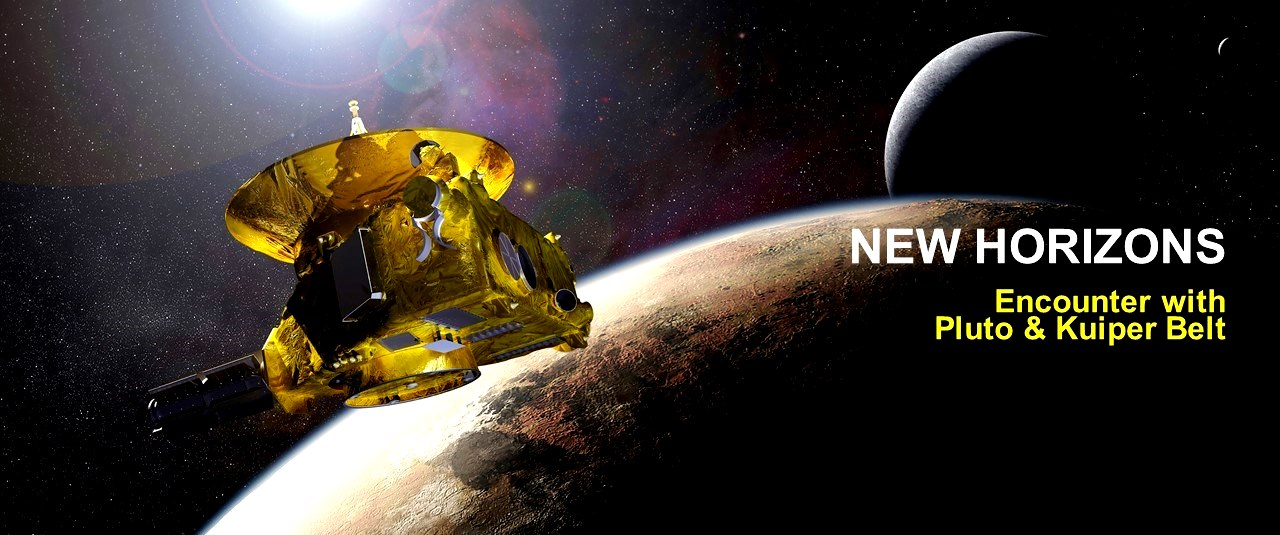

In [6]:
from IPython.display import Image
print('Image source: https://www.nasa.gov/ames/newhorizons')
Image(filename='plutoNewHorizons.jpg')

Images obtained from Deep space probe missions are often noisy because various factors (camera's electronics, random fluctuations in the arrivals of photons as captured by the sensor,..) 

A few real world examples are show below

source :  https://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367259

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


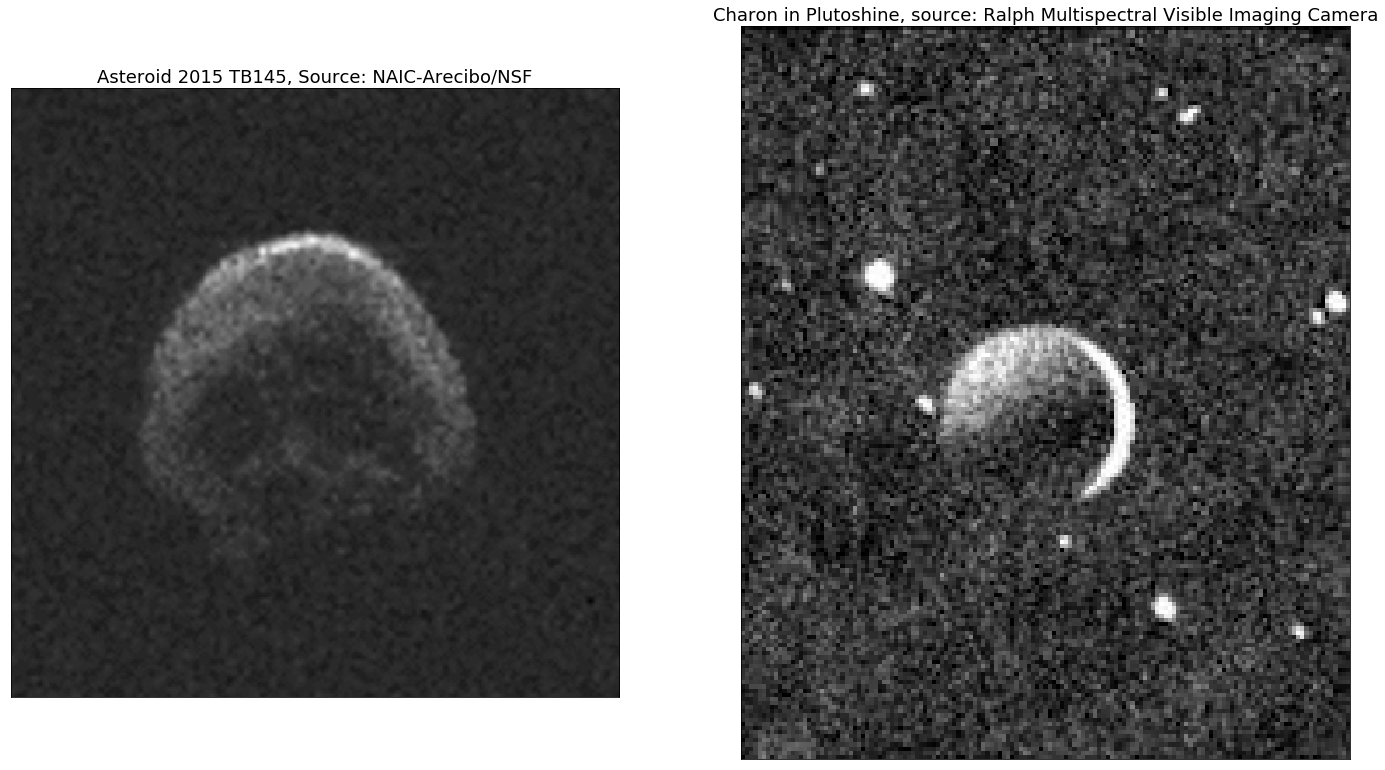

In [9]:
ImageNasa1 = misc.imread('skull2015-TB145.jpg')
ImageNasa2 = misc.imread('nh-charon-by-plutoshine.jpg')
fig = plt.figure(figsize = (24,24))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Asteroid 2015 TB145, Source: NAIC-Arecibo/NSF', fontsize=18)
plt.imshow(ImageNasa1)
ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Charon in Plutoshine, source: Ralph Multispectral Visible Imaging Camera', fontsize=18)
plt.imshow(ImageNasa2)
plt.show()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(444, 444)
float64


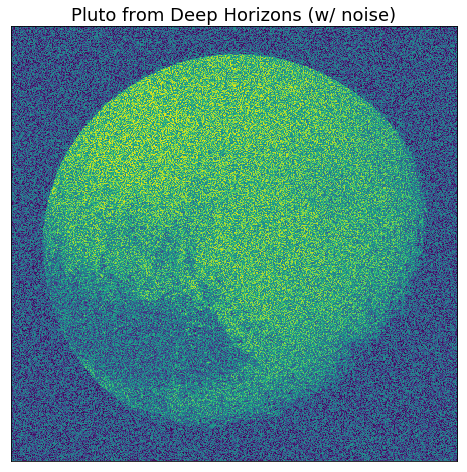

In [10]:
image = misc.imread('plutoLarge.png')
img = color.rgb2gray(image)
print img.shape
print img.dtype
noisy = img + 3*img.std() * np.random.random(img.shape)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Pluto from Deep Horizons (w/ noise)', fontsize=18)
ax1.imshow(noisy,aspect='auto')
plt.show()


The matrix data below encodes a series of images of Pluto, corrupted with Gaussian noise (assumed to arise from the imaging device). Use PCA to derive a better image.

#### Exercise I.4 Towards Portfolio optimization
(The exercise is inspired by [quantopian](https://www.quantopian.com/about))

<img src="portfolio.png" alt="Drawing" style="width: 500px;"/>

image credit:  [https://emerj.com/](https://emerj.com/ai-future-outlook/machine-learning-finance-interviews-podcasts/) 

__Exercise I.4.a__ As a second exercise, we will study how PCA can be used to optimize portfolios. Start by downloading the data from the following 10 stocks, 

IBM, MSFT, FB, T, INTC, ABX, NEM, AU, AEM, GFI. 

5 of those stocks come from tech companies, the remaining 5 come from gold mining companies

Load the stock prices between 2015-09-01 and 2016-11-01. Plot the results

In [ ]:
import yfinance as yf

start_date = '2015-09-01' 
end_date = '2016-11-01'

# put your code here

What you should obtain:


<img src="Portfolio1.png" alt="Drawing" style="width: 500px;"/>

image credit:  [https://emerj.com/](https://emerj.com/ai-future-outlook/machine-learning-finance-interviews-podcasts/) 

__Exercise I.4.b__ Store the stocks in a single matrix with rows = number of dates, columns = number of stocks in your portfolio. Then compute the PCA decomposition using the PCA decomposition from Scikit-learn. 


In [ ]:
from sklearn.decomposition import PCA


__Exercise I.4.c__ The PCA implementation from Scikit learn comes witn an attribute that enables you to determine the fraction of the total variance explained by the components you extract. Compute the percentage of the variance. 

In [ ]:
# put your result here


__Exercise I.4.d__ The principal components can be understood as encoding some underlying statistical factors that "drive" the return of the portfolio. we can then look at how much of the closing price evolution of each stock is driven by the hidden factors. To see this, we can, as we did for the image, compute the representation of each stock as a combination of the factors. Those representations are known as "factor returns". Plot those returns.


In [ ]:
# put the code here

__Exercise I.4.e__

Aside from the factor returns, we might want to investigate the factor exposures for each stock in the portfolio which are basically your principal components. Those components indicates how strongly each of the stock is influenced by the principal components. Plot those values in the (PCA1, PCA2) plane. 

In [ ]:
# put your code here



#### I.5. EigenFaces. 

Now that we have a better understanding of PCA, we can go back to the face dataset. Use the lines below to load the face images from the 'Labeled Faces in the Wild' dataset. Start by computing the decomposition of each face on the first $150$ principal faces. Then learn a Support vector classifier for the resulting dataset using radial basis functions and parameters $C=1000.0$ and $\gamma=0.005$

In [ ]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]


y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

#### I.6. Independent component analysis: The coktail party 

In this exercise, we will use another approach to dimensionality reduction, known as independent component analysis (ICA). ICA is particularly useful in speech or more generally, source separation. In the classical version of this problem, known as "The coktail party problem", one is interested in recovering two distinct signals from their mixing. 

<img src="ConversationMovie.jpg" alt="Drawing" style="width: 400px;"/>

image credit:  [The conversation](https://en.wikipedia.org/wiki/The_Conversation) 

__Exercise I.6.a.__ Using the FastICA transform from scikit-learn, recover the two speeches from the mixed1.wav and mixed1.wav files which are given on github. 

(Hint: start by storing the two signals 'samples1' and 'samples1' into a single matrix, then pass this matrix as an input to the FastICA method of Scikit-learn) 

In [ ]:
print(__doc__)

import os
import wave
import pylab
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

from sklearn.decomposition import FastICA, PCA

###############################################################################


# read data from wav files
sample_rate1, samples1 = wavfile.read('mixed1.wav')
sample_rate2, samples2 = wavfile.read('mixed2.wav')

print 'sample_rate1', sample_rate1
print 'sample_rate2', sample_rate2

# Use FastICA



__Exercise I.6.b.__ Once you have recovered the original signals, plot them as time series. Then use the lines below to store them in new .wav file. Then play them and compare them with their mixings.

In [ ]:

# write data to wav files
scaled1 = np.int16(recovered[:,0]/np.max(np.abs(recovered[:,0])) * 32767)
wavfile.write('recovered-1.wav', sample_rate1, scaled1)

scaled2 = np.int16(recovered[:,1]/np.max(np.abs(recovered[:,1])) * 32767)
wavfile.write('recovered-2.wav', sample_rate2, scaled2)


### Exercise I.7. Independent Component Analysis 

We consider a model of the form 

$$\mathbf{x} = \mathbf{M}\mathbf{s}$$

where $\mathbf{s}$ are independent sources (such as the recordings we used in the coktail party exercise). We want to recover the unmixing matrix $\mathbf{U} = \mathbf{M}^{-1}$ such that the sources can then be obtained via $\tilde{\mathbf{s}} = \mathbf{U}\mathbf{x}$. 

How do we recover $\mathbf{U}$ then ?

For a random variable $s$ withe density $p_s(s)$, the density of $\mathbf{x} = \mathbf{M}\mathbf{s}$ can be obtained as ($|\mathbf{U}|$ here denotes the absolute value of the determinant of the matrix $\mathbf{U}$).  

$$p_x(x) = p_s(\mathbf{U}\mathbf{x})|\mathbf{U}|\quad(*)$$

in order to recover the $\mathbf{s}$ from the mixing $\mathbf{M}\mathbf{s}$, we will proceed as usual and write down the joint density. Since we assumed that the sources are independent (we further assume that they are equally distributed), we can write  

$$p(s) = \prod_{i=1}^{|S|} p_s(s_i)$$


now using the relation $(*)$, we can use this density to get the density for $\mathbf{x}_i$, 

$$p(x) = \prod_{i=1}^{|S|} p_s(\mathbf{u}^T_i\mathbf{x})|\mathbf{U}|$$

where $\mathbf{u}_i$ is the $i^{th}$ row of the unmixing matrix $\mathbf{U}$. As for other learning problems, we can (1) assume that all the prototypes are independent, and hence write the total density as 

$$p(\left\{\mathbf{x}^{(i)}\right\}) = \prod_{j=1}^{N}\prod_{i=1}^{|S|} p_s(\mathbf{u}^T_i\mathbf{x}^{(j)})|\mathbf{U}|$$

the log of the probability density which gives 

$$\ell(\mathbf{U}) = \sum_{i=1}^{|S|} \sum_{j=1}^N \log p_s(\mathbf{u}_i^T\mathbf{x}^{(j)}) + \log(|\mathbf{U}|)$$


In order to recover the $\mathbf{U}$, we want to maximize the log likelihood. However, we are facing a last difficulty: how do we define the density $p_s$ ?

a probability density function $p(x)$ can be obtained as the derivative of the cumulative distribution function $F(X) = \int_{0}^X p(x)\; dx$ (which encodes the probability that the random variable takes values smaller then $X$). When no information is given, a common approach to define this density is by taking the function 
 
$$p_s(s) = (1-\text{tanh}^2(s))$$

Using this function as well as $\nabla_{\mathbf{U}}|\mathbf{U}| = |\mathbf{U}|(\mathbf{U}^{-1})^{T}$, recover the sources for the data below using gradient ascent.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

from sklearn.decomposition import PCA, FastICA

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

np.shape(X)
plt.scatter(X[:,0]/X.std(), X[:,1]/X.std(), alpha = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### Part II. generative adversarial networks

(Adapted from various sources including R.Apienza and M. Spinelli)

In this exercice, we will study how one can combine two neural networks to design a classifier that is more robust against adversarial samples. 
__Although the exercice might seem long, you will be guided through it and given all the necessary information.__ 

A generative Adversarial network (GAN) works by combining two interacting neural networks. GANs constitute one of the most promising approaches of the last few years. 

The first neural network is used to generate images that are as close as possible to the true data distribution (e.g. digits). The second neural network is trained to discriminate between the images produced by the generator and the images from the dataset (See the image below)


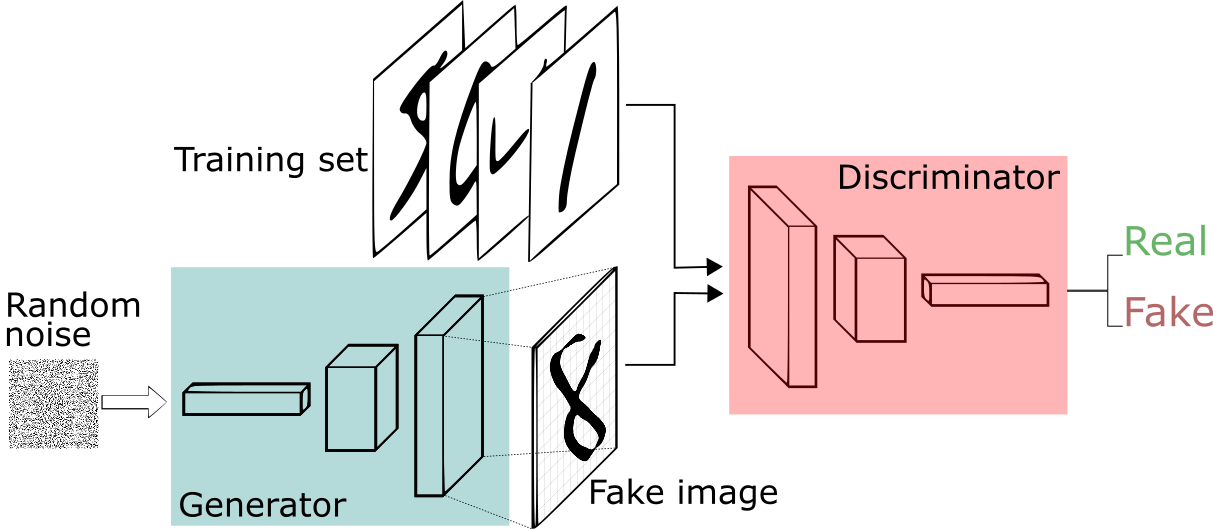

In [11]:
from IPython.display import Image
Image(filename='GANimage1.png')


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)
print(X_train.shape)

We will start by building the __discriminator__. At the ouptut of the discriminator, we want a [0,1] scalar indicating the probability that the input was a digit from the original dataset (1) or an artificially generated sample.

For this discriminator, we again use the sequential model from Keras. 

- We will add four layers with 32*k (k=1,2,4,8) filters of size [5,5] each. For those filters, set the activation function to be the LeakyReLU. In summary, you need to set three parameters
  1. The number of units (32*k)
  2. The size of each of the filters (5 by 5)
  3. The filter stride (see session 2, that is the number of pixels by which we translate the filters when doing the convolutions). Here we set it to 2
  4. Use padding = 'same' for now
  5. Finally set the activation to LeakyReLU with parameter alpha = 0.2
  6. For the first layer you also need to set the size of the input which for the MNIST dataset is 20. I.e input_size = (28,28,1)  
    
- After __each__ of those layers, we will add a dropout layer setting 40% of the units to zero at random when training the network (keep all the other parameters to their default values) (__see the figure below__)
- As in the second programming session, after __all__ the convolutions (i.e thus __only at the end__ of the network), we add a flattening layer which takes the image and reorganize it as a vector. (no argument needed here just add flatten)
- Then add a fully connected layer which sums up the entries of the (flattened) vector and pass it to a sigmoid in order to get a [0,1] output indicating whether the input was generated by the generator or is from the training set. This can be done with two lines: one that add a Dense layer with one unit and a second which adds a sigmoid. This is a simple line with two commands, __model.add(Dense(1))__ and __model.add(Activation('sigmoid'))__

Ok we are now done with the __discriminator__. Check the model using the command model.summary().

source: Srivastava et al. Dropout: A Simple Way to Prevent Neural Networks from Overfitting


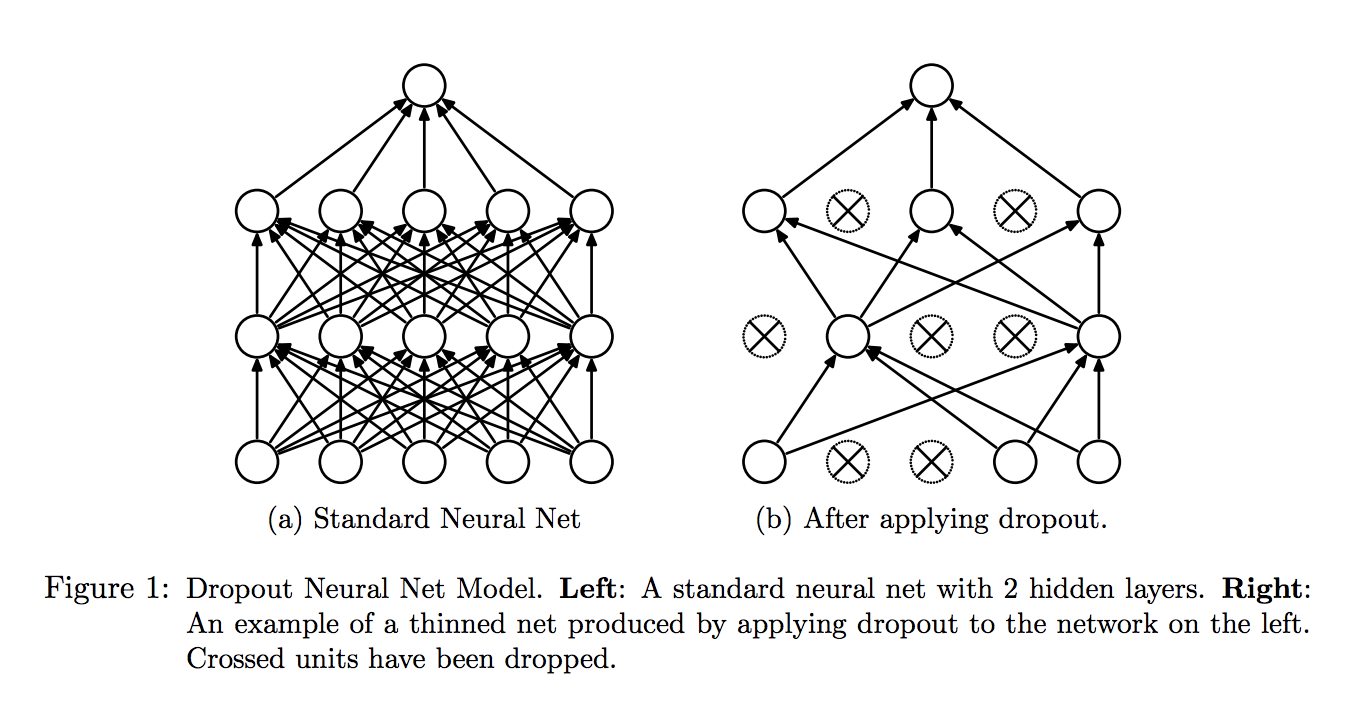

In [12]:
print('source: Srivastava et al. Dropout: A Simple Way to Prevent Neural Networks from Overfitting')
from IPython.display import Image
Image(filename='DropoutHinton.png')


In [ ]:
# put your code here 






We now build the __generator__. The generator is a second neural network that synthesizes images 
from a vector of noise (see above). The hope underlying the construction of a generative model is that it could ultimately capture the features underlying the images of the dataset (i.e understand the distribution of those images and hence be able to generate them)  

We will use a generator of the form shown below. To build this generator we will use the notion of 
transposed convolution. Recall that a convolution is an operation that takes as input an image and ouput a local average of the pixels from the input image (see the figure below as a reminder) 

source: https://openai.com/


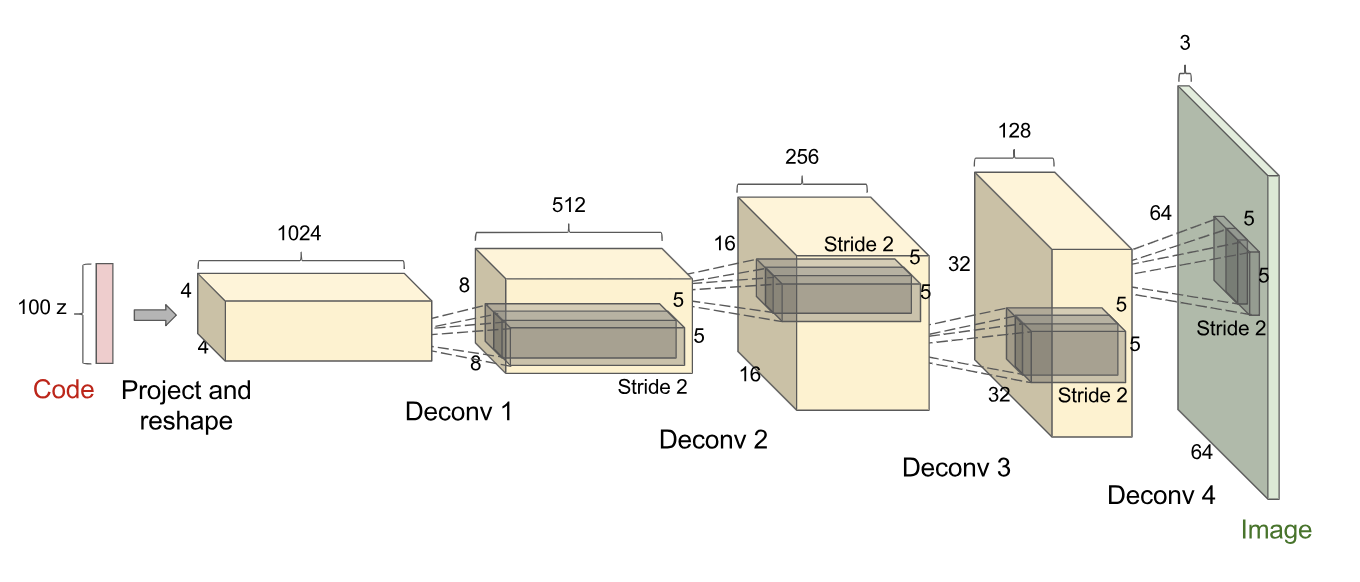

In [13]:
print('source: https://openai.com/')
from IPython.display import Image
Image(filename='GenerativeImage1.png')

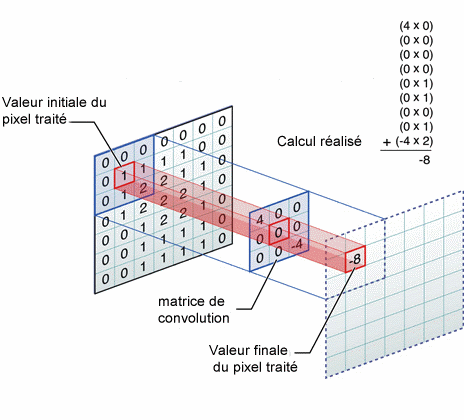

In [14]:
from IPython.display import Image
Image(filename='convolutionExplained1.png')

In the generative model, we want to generate images that have some local coherence. 

To achieve this, we will use the "reverse" of the convolution operator known as transposed convolution. 

The __transposed convolution__ starts from a smaller image, padds it with a border of zero and then apply to the extended result a convolution operator. In the example below the transposed convolution takes as input a 2x2 image and a 3x3 filter with a stride of 1. It then computes the convolution of the two.


![SegmentLocal](transposedConvolution.gif "segment")

The output to the transposed convolution operator is computed as follows (see the Keras doc)

new_rows = ((rows - 1) * strides[0] + kernel_size[0]
            - 2 * padding[0] + output_padding[0])
new_cols = ((cols - 1) * strides[1] + kernel_size[1]
            - 2 * padding[1] + output_padding[1])
            
When choosing padding ='same' which is what we will do here, the size of the padding (the zeros you add to the original image) is set so that the output has the same size as the input. 

As a consequence, if we take a filter of size k then we need to padd the original image with (k-1)/2 zeros. (But no worries, This is calculated automatically when setting padding = 'same').


To build the generator, follow the instructions below

 - Take a sequential model from Keras
 - Start the model with a dense layer of depth D=256 units with input dimension = 100 (we take a random vector of size 100 as our input)
 - After the first input layer we will add a (batch) normalization step. Batch normalization works by normalizing the inputs of the non linearity (see https://arxiv.org/pdf/1502.03167.pdf for more details)
 
 $$x_i \leftarrow \frac{x_i - \mu_i}{\sigma_i}$$ 
 
 After normalization, to avoid restricting the input to entral part of the non linearity, batch normalization adds two parameters $\gamma$ and $\beta$ which are "learned" automatically while training the network. This output to the batch normalization step thus reads as
 
 $$x_i \leftarrow \gamma\frac{x_i - \mu_i}{\sigma_i} + \beta $$
 
 This prevent a large variability in the input distribution to each layer. More details can be found in https://arxiv.org/pdf/1502.03167.pdf
 
When adding the BatchNormalization step, you only need to specify __one parameter__, the __momentum__ which you can take to be __.9__

- You can now add the activation unit. We choose to add a 'Relu'
- Add a Reshape Layer that turns the output of the previous steps (size at that point should be 7*7*N) into a set of N images (i.e a variable of size (7,7,N)). (This really is one line: __.add(Reshape((7, 7, N))__)

- Finally, add the usual dropout step to set 40% of the units to zero

In [ ]:
# put your code here



Ok. From what we have done so far, we now have a set of images of size 7 by 7 whereas we would like one artificial image of size 28 by 28. 

- Add an upsampling step (Upsampling2D). Without any argument, this will interpolate the input images by repeating each row and each column once. The image should now be of size 14 by 14

- Add a first transposed convolutional layer (Conv2DTranspose) with three parameters:
    1. The depth = D/2 (see above)
    2. The filter size = 5
    3. padding = 'same'
   
- Add a batch normalization step with same momentum (.9) as before
- Add the activations (relu) and upsample one more time. We now have a set of images of size 28 by 28. 

- Add twice the following combination (using a number of units D/4 and D/8)

    1. 2D Transposed convolutional layer
    2. Batch Normalization layer (same momentum as before)
    3. Activation (relu)
    
We now still have a collection of 28 by 28 images generated by each of the hidden units and we want a single 28 by 28 output. 

- Add a last transposed convolutional layer with a single hidden unit (5 by 5 filters and padding same)
- Add a sigmoid activation (for this example, we want the pixel values to lie in [0,1])
- Check the summary of your model by using model.summary()
    


In [ ]:
# put your code here




We now have both the discriminator and the generator and we are almost there. Before training the GAN, we need to do a couple more things. First we need to set up the learning process as we did during class for the simple convolutional neural network. Except that we now set it for the combination.

1. Set up Discriminator.  

 - As we did in the programming session for the simple CNN, first define the optimizer. Use the RMSProp optimizer from Keras with a learning rate of .0008, a weight decay of 6e-8 and set an additional clipvalue parameter equal to 1 (so 3 parameters in total). __optimizer = RMSprop()__ (you can find more information on gradient clipping for ex. here https://www.quora.com/What-is-gradient-clipping-and-why-is-it-necessary)
 
 
 - Use the __compile__ function to set up the learning process as we did during class. Use the binary cross entropy loss with the optimizer you defined above and set the metric to 'accuracy' (3 parameters in total)


In [ ]:
# put your code here




We now set up the optimization framework for the adversarial network. We first build the adversarial network from the combination of the generator and the discriminator. It is thus a two pieces network. To build this combination, use the keras model you built for the discriminator and the generator and associate them into a single sequential adversarial model using the liens below

In [ ]:
AdversarialModel = Sequential()
AdversarialModel.add(self.generator())
AdversarialModel.add(self.discriminator())

Now set the optimization framework for that model using teh exact same parameters and command lines as for the discriminator model __except__ for the learning rate which we now set to 0.0004

In [ ]:
# put your code here




OK. We can finally train the generative/discriminative combination. The principle is as follows. We will alternate between the following two steps:

1.  Training the discriminator by combining images from the training set and images generated by the adversarial generator. This step is thus a simple supervised learning problem applied to the discriminator

2. We then train the adversarial network (i.e the combination generator + discriminator) to return label 1 all the time, that is for any vector of noise  

Within each outer iteration we will use a single gradient update via the function __train_on_batch__ from Keras (see below) 


You need to set 
- The number of epochs (you will need to have a sufficiently large number here. Something on the order of 20000 but you can try various number). Here epochs means number of iterations 
- The batch size, which is the total number of images you use at each iteration (Set it to 32) 
- Also set up a saveStep param which is the multiple of iterations after which you save the images

In [ ]:
for iterNum in range(epochs):
    
    ## train the discriminator
    random_index =  np.random.randint(0, X_train.shape[0],size=batch/2)
    TrueImages = X_train[random_index,:,:,:].reshape(batch/2,X_train.shape[1],X_train.shape[2],1)
    
    # generating the fake images
    gen_noise = np.random.normal(0, 1, (batch/2,100))
    
    # Add code: use your generator to create teh fake (batch/2) images
    FakeImages = YourGenerator.predict(gen_noise)
    
    
    CombinedImages = np.concatenate((TrueImages, FakeImages))
    CombinedLabels = np.concatenate((np.ones((batch/2, 1)), np.zeros((batch/2, 1))))

    # put your discriminator here
    trainingStep1 = YourDiscriminator.train_on_batch(CombinedImages, CombinedLabels)
    # train the generator
    noise = np.random.normal(0, 1, (batch,100))
    AdversarialLabels = np.ones((batch, 1))
    
    # Add code here, replace with the name of your AdversarialModel (i.e combined Generator-Discriminator)
    trainingStep2 = AdversarialModel.train_on_batch(noise, AdversarialLabels)
    
    print ('epoch: %d, [Discriminator :: loss: %f], [ Generator :: loss: %f]' % (iterNum, trainingStep1[0], trainingStep2))
            
    if iterNum % saveStep == 0 : 
        
        # add the modified piece of code (below) for image display
        
        
        

You can adapt/use the snippet below to plot and/or save a set of images generated by the generator when your saveStep is amultiple

In [ ]:
     images = YourGenerator.predict(noise)
        
        plt.figure(figsize=(10,10))
    
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [X_train.shape[1],X_train.shape[2]])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
            plt.tight_layout()
                if save2file:
                    plt.savefig(filename)
                    plt.close('all')
                else:
                    plt.show()